## Movielens

In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *

Data available from http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [2]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
InteractiveShell.ast_node_interactivity = "all"
display(HTML("<style>.container { width:90% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

In [3]:
path = Path(os.path.dirname(os.getcwd()))/'data/ml-latest-small/'
path

WindowsPath('D:/gdrive/Programs/fastai/courses/data/ml-latest-small')

We're working with the movielens data, which contains one rating per row, like this:

In [4]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Just for display purposes, let's read in the movie names too.

In [5]:
movies = pd.read_csv(path/'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Create subset for Excel

We create a crosstab of the most popular movies and most movie-addicted users which we'll copy into Excel for creating a simple example. This isn't necessary for any of the modeling below however.

In [9]:
g=ratings.groupby('userId')['rating'].count()
topUsers=g.sort_values(ascending=False)[:20]
topUsers.name = 'userRatingCnt'

g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:20]
topMovies.name = 'movieRatingCnt'

top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')

pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,47,50,110,150,260,296,318,356,480,527,589,593,780,1196,1198,2571,2858,2959,4993
userId,,,,,,,,,,,,,,,,,,,,
68,2.5,4.0,3.0,2.5,3.0,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,4.0,5.0,5.0,4.5,5.0,2.5,4.5
177,5.0,4.5,4.0,NaN,4.0,2.5,5.0,5.0,5.0,3.5,4.5,NaN,5.0,3.5,3.0,3.5,3.0,4.0,4.0,2.0
182,4.0,4.0,4.5,3.5,2.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,1.5,3.0,3.5,5.0,5.0,5.0,3.0
232,3.5,4.5,NaN,4.5,4.5,4.5,5.0,5.0,4.0,3.0,4.5,4.0,NaN,3.5,4.5,4.5,4.5,NaN,4.5,3.5
249,4.0,5.0,4.0,5.0,2.5,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,4.0,5.0,5.0,5.0,4.5,5.0,5.0
274,4.0,4.0,4.0,4.5,NaN,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,3.5,4.5,4.0,4.0,5.0,5.0,3.0
288,4.5,3.5,NaN,5.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,1.0,4.5,5.0,3.0,NaN,3.5,5.0
298,2.0,4.0,3.5,3.0,NaN,4.0,4.5,3.5,3.0,4.0,NaN,4.0,NaN,2.5,4.0,4.5,4.0,4.0,5.0,4.0
307,4.0,4.0,4.5,3.5,2.0,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,2.0,3.0,4.0,3.5,4.0,4.0,3.0


## Collaborative filtering

In [10]:
val_idxs = get_cv_idxs(len(ratings))
wd = 2e-4
n_factors = 50

In [11]:
cf = CollabFilterDataset.from_csv(path, 'ratings.csv', 'userId', 'movieId', 'rating')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [12]:
learn.fit(1e-2, 4, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                                                                                                                                                   
    0      0.739221   0.772979  
    1      0.736339   0.751034                                                                                                                                                   
    2      0.585534   0.735674                                                                                                                                                   
    3      0.730659   0.766618                                                                                                                                                   
    4      0.701046   0.743585                                                                                                                                                   
    5      0.548311   0.730467                                               

[0.7338232277343121]

Let's compare to some benchmarks. Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on [RMSE](http://www.statisticshowto.com/rmse/) of 0.91. We'll need to take the square root of our loss, since we use plain MSE.

In [35]:
np.sqrt(0.739)

0.8596510920134982

Looking good - we've found a solution better than any of those benchmarks! Let's take a look at how the predictions compare to actuals for this model.

In [36]:
preds = learn.predict()

In [41]:
val_idxs

array([67037, 42175, 93850, ..., 67290, 33423, 98552])

In [48]:
preds

array([4.30642, 3.93169, 4.25852, ..., 3.77566, 3.51006, 3.17821], dtype=float32)

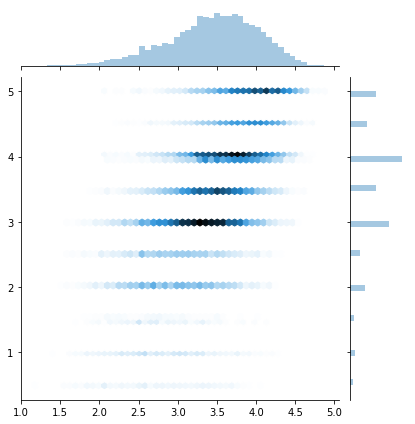

In [51]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

## Analyze results

### Movie bias

In [14]:
movie_names = movies.set_index('movieId')['title'].to_dict()
g = ratings.groupby('movieId')['rating'].count()
topMovies = g.sort_values(ascending=False).index.values[:3000]
topMovieIdx = np.array([cf.item2idx[o] for o in topMovies])

In [16]:
m = learn.model
m.cuda()

EmbeddingDotBias(
  (u): Embedding(610, 50)
  (i): Embedding(9724, 50)
  (ub): Embedding(610, 1)
  (ib): Embedding(9724, 1)
)

In [17]:
m.ib(V(topMovieIdx))

tensor([[ 0.9068],
        [ 1.2782],
        [ 0.8464],
        ...,
        [-0.1951],
        [ 0.0871],
        [ 0.0981]], device='cuda:0', grad_fn=<EmbeddingBackward>)

First, we'll look at the movie bias term. Here, our input is the movie id (a single id), and the output is the movie bias (a single float).

In [18]:
movie_bias = to_np(m.ib(V(topMovieIdx)))

In [19]:
movie_bias

array([[ 0.90675],
       [ 1.27822],
       [ 0.84638],
       ...,
       [-0.19506],
       [ 0.08715],
       [ 0.09814]], dtype=float32)

In [22]:
movie_bias.shape

(3000, 1)

In [23]:
movie_ratings = [(b[0], movie_names[i]) for i, b in zip(topMovies, movie_bias)]

Now we can look at the top and bottom rated movies. These ratings are corrected for different levels of reviewer sentiment, as well as different types of movies that different reviewers watch.

In [24]:
sorted(movie_ratings, key=lambda o: o[0])[:15]

[(-0.7288372, 'Speed 2: Cruise Control (1997)'),
 (-0.6967111, 'Godzilla (1998)'),
 (-0.6917538, 'Spice World (1997)'),
 (-0.6912338, 'Stuart Saves His Family (1995)'),
 (-0.68544215, 'Batman & Robin (1997)'),
 (-0.6799224, 'Anaconda (1997)'),
 (-0.6477323, 'Jason X (2002)'),
 (-0.64150125, 'Problem Child (1990)'),
 (-0.6379852, 'Catwoman (2004)'),
 (-0.62754655, 'Flintstones in Viva Rock Vegas, The (2000)'),
 (-0.6275329, 'Karate Kid, Part III, The (1989)'),
 (-0.61767286, 'Battlefield Earth (2000)'),
 (-0.5971595, 'Super Mario Bros. (1993)'),
 (-0.5909341, 'Twilight (2008)'),
 (-0.58783764, 'Wild Wild West (1999)')]

In [25]:
sorted(movie_ratings, key=itemgetter(0))[:15]

[(-0.7288372, 'Speed 2: Cruise Control (1997)'),
 (-0.6967111, 'Godzilla (1998)'),
 (-0.6917538, 'Spice World (1997)'),
 (-0.6912338, 'Stuart Saves His Family (1995)'),
 (-0.68544215, 'Batman & Robin (1997)'),
 (-0.6799224, 'Anaconda (1997)'),
 (-0.6477323, 'Jason X (2002)'),
 (-0.64150125, 'Problem Child (1990)'),
 (-0.6379852, 'Catwoman (2004)'),
 (-0.62754655, 'Flintstones in Viva Rock Vegas, The (2000)'),
 (-0.6275329, 'Karate Kid, Part III, The (1989)'),
 (-0.61767286, 'Battlefield Earth (2000)'),
 (-0.5971595, 'Super Mario Bros. (1993)'),
 (-0.5909341, 'Twilight (2008)'),
 (-0.58783764, 'Wild Wild West (1999)')]

In [26]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(1.2782172, 'Shawshank Redemption, The (1994)'),
 (0.90675044, 'Forrest Gump (1994)'),
 (0.9053797,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (0.8718193, 'Usual Suspects, The (1995)'),
 (0.8698651, 'Goodfellas (1990)'),
 (0.86252034, 'Casablanca (1942)'),
 (0.85238075, 'Dark Knight, The (2008)'),
 (0.8463772, 'Pulp Fiction (1994)'),
 (0.8389154, 'Star Wars: Episode IV - A New Hope (1977)'),
 (0.83487916, "Schindler's List (1993)"),
 (0.8340714, 'Departed, The (2006)'),
 (0.8323046, 'Princess Bride, The (1987)'),
 (0.82111305, 'Matrix, The (1999)'),
 (0.81248754, 'American History X (1998)'),
 (0.8106447, "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)")]

### Embedding interpretation

We can now do the same thing for the embeddings.

In [27]:
movie_emb = to_np(m.i(V(topMovieIdx)))
movie_emb.shape

(3000, 50)

Because it's hard to interpret 50 embeddings, we use [PCA](https://plot.ly/ipython-notebooks/principal-component-analysis/) to simplify them down to just 3 vectors. 

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
movie_pca = pca.fit(movie_emb.T).components_

In [29]:
movie_pca.shape

(3, 3000)

In [34]:
fac0 = movie_pca[0]
movie_comp = [(f, movie_names[i]) for f, i in zip(fac0, topMovies)]

Here's the 1st component. It seems to be 'easy watching' vs 'serious'.

In [35]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.11780636, 'Pulp Fiction (1994)'),
 (0.08587265, 'Godfather, The (1972)'),
 (0.08193197, 'Big Lebowski, The (1998)'),
 (0.08099219, 'Memento (2000)'),
 (0.07755126, 'Fight Club (1999)'),
 (0.072375916, 'Monty Python and the Holy Grail (1975)'),
 (0.07202342, 'Kill Bill: Vol. 1 (2003)'),
 (0.07141133, 'Godfather: Part II, The (1974)'),
 (0.07116576, 'American Beauty (1999)'),
 (0.06924659, "Schindler's List (1993)")]

In [36]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.07456372, 'Twister (1996)'),
 (-0.06934725, 'Congo (1995)'),
 (-0.056109384, 'Independence Day (a.k.a. ID4) (1996)'),
 (-0.0560144, 'First Knight (1995)'),
 (-0.05417556, 'Broken Arrow (1996)'),
 (-0.052382234, 'Batman Forever (1995)'),
 (-0.0487999, 'Lara Croft: Tomb Raider (2001)'),
 (-0.04733409, 'Net, The (1995)'),
 (-0.046896946, 'Wild Wild West (1999)'),
 (-0.046308193, "Big Momma's House (2000)")]

In [37]:
fac1 = movie_pca[1]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac1, topMovies)]

Here's the 2nd component. It seems to be 'CGI' vs 'dialog driven'.

In [38]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.055649273, 'Mulholland Drive (2001)'),
 (0.053581417, "Boys Don't Cry (1999)"),
 (0.04703062, 'Battlefield Earth (2000)'),
 (0.045255855, 'Eyes Wide Shut (1999)'),
 (0.044065822, 'Tank Girl (1995)'),
 (0.043190658, 'Talented Mr. Ripley, The (1999)'),
 (0.042006902, 'AVP: Alien vs. Predator (2004)'),
 (0.04182584, 'Natural Born Killers (1994)'),
 (0.03965983,
  'Bicycle Thieves (a.k.a. The Bicycle Thief) (a.k.a. The Bicycle Thieves) (Ladri di biciclette) (1948)'),
 (0.038483057, 'Blood Simple (1984)')]

In [39]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.118071824, 'Matrix, The (1999)'),
 (-0.105455525, 'Star Wars: Episode IV - A New Hope (1977)'),
 (-0.10539981,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (-0.10097498, 'Independence Day (a.k.a. ID4) (1996)'),
 (-0.098080575, 'Jurassic Park (1993)'),
 (-0.097486064, 'Back to the Future (1985)'),
 (-0.09219005, 'Braveheart (1995)'),
 (-0.09191182, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (-0.08999929, 'True Lies (1994)'),
 (-0.08729803, 'Die Hard (1988)')]

We can draw a picture to see how various movies appear on the map of these components. This picture shows the first two components.

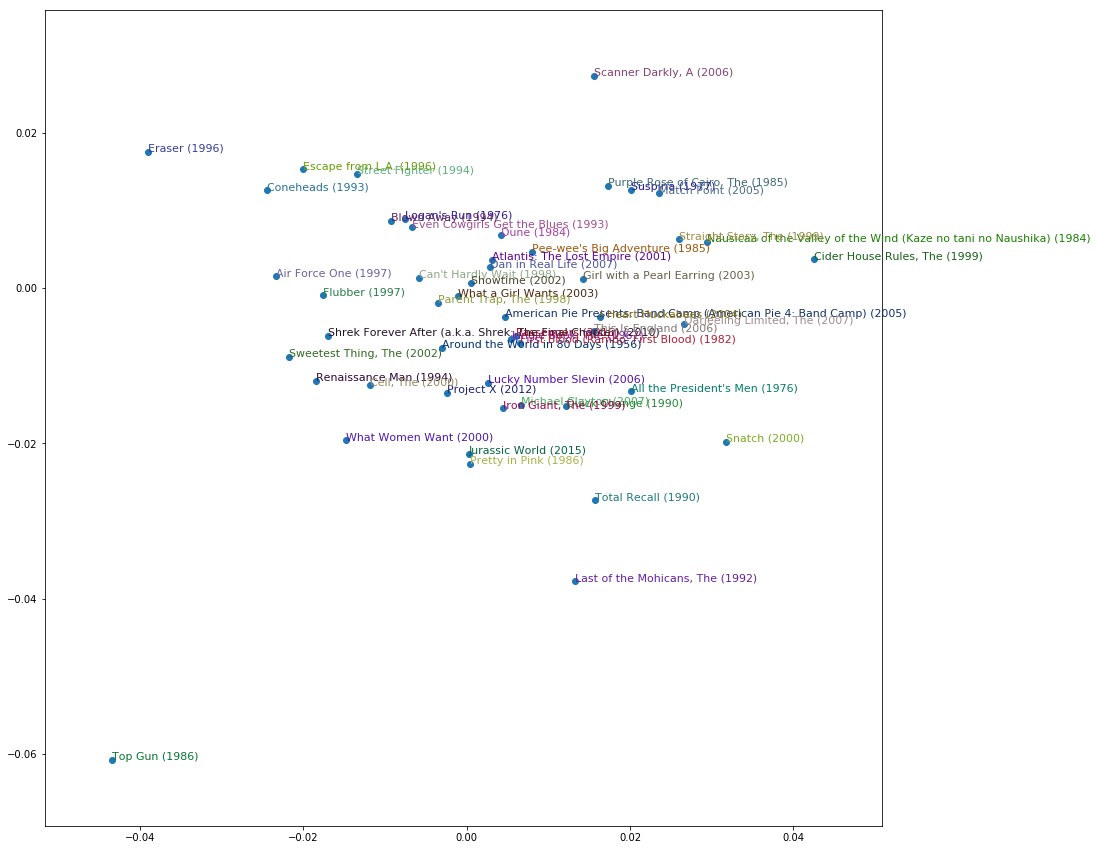

In [40]:
idxs = np.random.choice(len(topMovies), 50, replace=False)
X = fac0[idxs]
Y = fac1[idxs]
_ = plt.figure(figsize=(15,15))
_ = plt.scatter(X, Y)
for i, x, y in zip(topMovies[idxs], X, Y):
    _ = plt.text(x,y,movie_names[i], color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

## Collab filtering from scratch

### Dot product example

In [41]:
a = T([[1.,2],[3,4]])
b = T([[2.,2],[10,10]])
a,b

(tensor([[1., 2.],
         [3., 4.]], device='cuda:0'), tensor([[ 2.,  2.],
         [10., 10.]], device='cuda:0'))

In [42]:
a*b

tensor([[ 2.,  4.],
        [30., 40.]], device='cuda:0')

In [100]:
(a*b).sum(1)


  6
 70
[torch.FloatTensor of size 2]

In [101]:
class DotProduct(nn.Module):
    def forward(self, u, m): return (u*m).sum(1)

In [102]:
model=DotProduct()

In [103]:
model(a,b)


  6
 70
[torch.FloatTensor of size 2]

### Dot product model

In [43]:
u_uniq = ratings.userId.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
ratings.userId = ratings.userId.apply(lambda x: user2idx[x])

m_uniq = ratings.movieId.unique()
movie2idx = {o:i for i,o in enumerate(m_uniq)}
ratings.movieId = ratings.movieId.apply(lambda x: movie2idx[x])

n_users=int(ratings.userId.nunique())
n_movies=int(ratings.movieId.nunique())

In [44]:
class EmbeddingDot(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        self.u = nn.Embedding(n_users, n_factors)
        self.m = nn.Embedding(n_movies, n_factors)
        self.u.weight.data.uniform_(0,0.05)
        self.m.weight.data.uniform_(0,0.05)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        u,m = self.u(users),self.m(movies)
        return (u*m).sum(1).view(-1, 1)

In [45]:
x = ratings.drop(['rating', 'timestamp'],axis=1)
y = ratings['rating'].astype(np.float32)

In [46]:
data = ColumnarModelData.from_data_frame(path, val_idxs, x, y, ['userId', 'movieId'], 64)

In [47]:
wd = 1e-5
model = EmbeddingDot(n_users, n_movies).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [50]:
fit(model, data, 5, opt, F.mse_loss)

epoch      trn_loss   val_loss                                                                                                                                                   
    0      0.780035   1.201994  
    1      0.681249   1.179727                                                                                                                                                   
    2      0.576813   1.171497                                                                                                                                                   
    3      0.470243   1.172725                                                                                                                                                   
    4      0.395176   1.178809                                                                                                                                                   



[1.178809041691304]

In [51]:
set_lrs(opt, 0.01)

In [52]:
fit(model, data, 5, opt, F.mse_loss)

epoch      trn_loss   val_loss                                                                                                                                                   
    0      0.253111   1.143869  
    1      0.238623   1.140603                                                                                                                                                   
    2      0.238461   1.141155                                                                                                                                                   
    3      0.231588   1.142696                                                                                                                                                   
    4      0.232142   1.145413                                                                                                                                                   



[1.145412934768086]

### Bias

In [53]:
min_rating, max_rating = ratings.rating.min(), ratings.rating.max()
min_rating, max_rating

(0.5, 5.0)

In [54]:
def get_emb(ni,nf):
    e = nn.Embedding(ni, nf)
    e.weight.data.uniform_(-0.01,0.01)
    return e

class EmbeddingDotBias(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        (self.u, self.m, self.ub, self.mb) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors), (n_users,1), (n_movies,1)
        ]]
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        um = (self.u(users)* self.m(movies)).sum(1)
        res = um + self.ub(users).squeeze() + self.mb(movies).squeeze()
        res = F.sigmoid(res) * (max_rating-min_rating) + min_rating
        return res.view(-1, 1)

In [55]:
wd = 2e-4
model = EmbeddingDotBias(cf.n_users, cf.n_items).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [56]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                                                                                                                                   
    0      0.806046   0.817437  
    1      0.75753    0.795415                                                                                                                                                   
    2      0.746771   0.788675                                                                                                                                                   



[0.7886747562823809]

In [94]:
set_lrs(opt, 1e-2)

In [95]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                                                                                                                                   
    0      0.699253   0.781812  
    1      0.707719   0.780894                                                                                                                                                   
    2      0.702487   0.780169                                                                                                                                                   



[0.7801685714414893]

### Mini net

In [96]:
class EmbeddingNet(nn.Module):
    def __init__(self, n_users, n_movies, nh=10, p1=0.05, p2=0.5):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(movies)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_rating-min_rating+1) + min_rating-0.5

In [97]:
wd = 1e-5
model = EmbeddingNet(n_users, n_movies).cuda()
opt = optim.Adam(model.parameters(), 1e-3, weight_decay=wd)

In [98]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                                                                                                                                   
    0      0.887416   0.80242   
    1      0.784374   0.779802                                                                                                                                                   
    2      0.740769   0.76733                                                                                                                                                    



[0.7673300177046579]

In [99]:
set_lrs(opt, 1e-3)

In [100]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                                                                                                                                   
    0      0.735848   0.765499  
    1      0.720108   0.772099                                                                                                                                                   
    2      0.728525   0.772652                                                                                                                                                   



[0.7726518002663311]